<a href="https://colab.research.google.com/github/GuilhermeVoyna/maua-optic/blob/main/IMT_Roteiro_Estudos_P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/Rogerio-mack/IMT_CD_2024/blob/main/maua_logo.png?raw=true" width=300, align="right">
<br>

# Roteiro de estudo

# Seleção de Features e Modelos

* **Ganho de informação**, `SelectKBest`, `mutual_info_classif` ` (random_state=)`

* **Sem necessidade de encode de variáveis**, se houver será fornecido e você precisa saber usar as funções `fit()`, `transform()` e/ou `fit_transform()`

* **Normalização.** `StandardScaler()`... lembre-se `fit_transform(X_train)`, `transform(X_test)`,

* **Classificadores.** Pode surgir novos classificadores para usar e indicar hiperparâmetros. `classification_report()`

* **Seleção dos modelos:** `GridSearchCV()`

* **PCA**, `pca = PCA(n_components=4)` ou `pca = PCA(0.90)`, `pca.fit_transform(X_train)`, `pca.transform(X_test)`, saiba comparar os resultado da classificação com valores de pca

* **NÃO CAI**. modelos de regressão diretamente (mas veja séries temporais), encodes, tf-idf ou embeddings (parte prática).



In [20]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [54]:
# prompt: leia o df https://github.com/Rogerio-mack/IMT_CD_2024/blob/main/data/blood_donate.csv


# Read the dataframe directly from the URL
url = "https://raw.githubusercontent.com/Rogerio-mack/IMT_CD_2024/main/data/blood_donate.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataframe

In [55]:
df.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,donated
1,0,13,3250,28,donated
2,1,16,4000,35,donated
3,2,20,5000,45,donated
4,1,24,6000,77,not donated


Ganho de informaçã

In [57]:

# Separando as variáveis independentes (X) e dependente (y)
X = df[df.columns[:-1]]
y = df["Class"].map({"donated": 1, "not donated": 0})  # Transformar classe em valores binários

# Aplicando SelectKBest com mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k='all')
X_selected = selector.fit_transform(X, y)

# Obtendo os escores de ganho de informação
scores = selector.scores_

# Criando um DataFrame para visualizar os resultados
feature_scores = pd.DataFrame({"Feature": X.columns, "Mutual Information Score": scores})

print(feature_scores)

     Feature  Mutual Information Score
0    Recency                  0.062072
1  Frequency                  0.026472
2   Monetary                  0.073718
3       Time                  0.016018


Normalization

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separando as variáveis independentes (X) e dependente (y)
X = df[["Recency", "Frequency", "Monetary", "Time"]]
y = df["Class"].map({"donated": 1, "not donated": 0})  # Transformar classe em valores binários

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Inicializando o StandardScaler
scaler = StandardScaler()

# Ajustando e transformando os dados de treinamento
X_train_scaled = scaler.fit_transform(X_train)

# Transformando os dados de teste
X_test_scaled = scaler.transform(X_test)

# Exibindo os dados normalizados
print("Dados de treino normalizados:\n", X_train_scaled[:3])
print("Dados de teste normalizados:\n", X_test_scaled[:3])


Dados de treino normalizados:
 [[ 1.58840715 -0.4313171  -0.4313171   0.57464175]
 [ 0.50901229 -0.25867478 -0.25867478 -0.3318315 ]
 [ 0.149214   -0.77660174 -0.77660174 -0.94988144]]
Dados de teste normalizados:
 [[-0.69031533 -0.25867478 -0.25867478  0.36862511]
 [-0.69031533  0.77717914  0.77717914 -0.24942484]
 [-0.93018085 -0.77660174 -0.77660174 -1.3207114 ]]


Classsifier


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression(C=1.0, solver='liblinear', random_state=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       109
           1       0.71      0.12      0.21        41

    accuracy                           0.75       150
   macro avg       0.73      0.55      0.53       150
weighted avg       0.74      0.75      0.67       150



Grid search

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Definição do modelo
model = LogisticRegression(random_state=1)

# Grid de hiperparâmetros
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Configuração do GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Treinando com os dados normalizados
grid_search.fit(X_train_scaled, y_train)

# Melhor modelo e avaliação
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Classification Report para Logistic Regression:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Melhores hiperparâmetros: {'C': 0.1, 'solver': 'liblinear'}
Classification Report para Logistic Regression:
              precision    recall  f1-score   support

           0       0.75      1.00      0.85       109
           1       1.00      0.10      0.18        41

    accuracy                           0.75       150
   macro avg       0.87      0.55      0.52       150
weighted avg       0.82      0.75      0.67       150



PCA

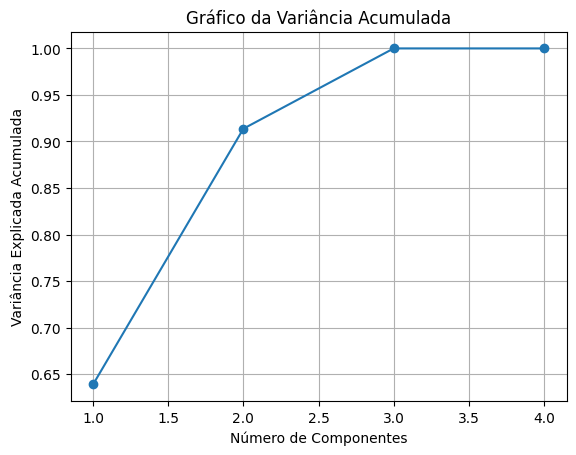

In [61]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Ajustar o PCA sem definir n_components
pca = PCA()
pca.fit(X_train_scaled)

# Variância explicada acumulada
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Gráfico da variância acumulada
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Gráfico da Variância Acumulada')
plt.grid()
plt.show()


In [62]:
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier  # Exemplo de classificador
# Aplicação do PCA com 4 componentes principais
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# Aplicação do PCA com 90% da variância explicada
pca = PCA(0.90)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Mostrando quantos componentes foram selecionados
print(f"Componentes principais selecionados para 90% da variância: {pca.n_components_}")


Componentes principais selecionados para 90% da variância: 2


In [63]:
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print("Resultados sem PCA:")
print(classification_report(y_test, y_pred))


Resultados sem PCA:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       109
           1       0.54      0.37      0.43        41

    accuracy                           0.74       150
   macro avg       0.66      0.62      0.63       150
weighted avg       0.72      0.74      0.72       150



In [64]:
clf_pca = RandomForestClassifier(random_state=1)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)

print("Resultados com PCA:")
print(classification_report(y_test, y_pred_pca))


Resultados com PCA:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       109
           1       0.70      0.46      0.56        41

    accuracy                           0.80       150
   macro avg       0.76      0.70      0.71       150
weighted avg       0.79      0.80      0.79       150



## Teoria

* Ganho Informação e Entropia, nós terminais de árvores de decisão
* Classificadores estudados, suas características, propriedades
* Cross-Validation, conjunto de validação
* Métricas de classificação, mas sem necessidade de cálculo
* TF-IDF, distância cosseno





1. Ganho de Informação e Entropia em Árvores de Decisão
Teoria Geral
Entropia: É uma medida da incerteza ou desordem em um conjunto de dados. No contexto de árvores de decisão, é usada para avaliar a pureza de um nó.

Fórmula:
𝐻
(
𝑆
)
=
−
∑
𝑖
=
1
𝑐
𝑃
𝑖
log
⁡
2
𝑃
𝑖
H(S)=−∑
i=1
c
​
 P
i
​
 log
2
​
 P
i
​
 , onde
𝑃
𝑖
P
i
​
  é a proporção de elementos da classe
𝑖
i.
Se todos os elementos em um nó pertencem à mesma classe, a entropia é 0 (nó puro). Se são distribuídos igualmente entre as classes, a entropia é máxima.
Ganho de Informação: Mede a redução da entropia ao dividir os dados em subconjuntos com base em um atributo. É usado para escolher o melhor atributo na construção da árvore.

Fórmula:
𝐼
𝐺
=
𝐻
(
𝑆
)
−
∑
𝑖
=
1
𝑘
∣
𝑆
𝑖
∣
∣
𝑆
∣
𝐻
(
𝑆
𝑖
)
IG=H(S)−∑
i=1
k
​
  
∣S∣
∣S
i
​
 ∣
​
 H(S
i
​
 ), onde
𝑆
𝑖
S
i
​
  são os subconjuntos após a divisão.
Nós Terminais
São os folhas da árvore de decisão.
Cada nó terminal contém uma predição de classe ou uma distribuição de probabilidades das classes.
A pureza dos nós terminais é maximizada, pois são criados para minimizar a entropia ou maximizar outro critério, como o índice de Gini.
2. Classificadores Estudados
Características Gerais
Logistic Regression:

Modelo linear usado para classificação binária.
Baseado na função logística
𝜎
(
𝑧
)
=
1
1
+
𝑒
−
𝑧
σ(z)=
1+e
−z

1
​
 .
Propriedade principal: probabilidade de cada classe como saída.
Random Forest:

Conjunto de árvores de decisão.
Usa amostragem bootstrap e combina predições (média para regressão, votação para classificação).
Propriedade principal: reduz overfitting em relação a uma única árvore.
SVM (Support Vector Machines):

Classificador que maximiza a margem entre as classes.
Pode usar kernels para separar classes em espaços não lineares.
KNN (K-Nearest Neighbors):

Classifica um ponto com base nas classes dos
𝑘
k-vizinhos mais próximos.
Simples, mas sensível à escala dos dados.
Naive Bayes:

Baseado na probabilidade Bayesiana.
Assume independência entre as variáveis.
Propriedades Importantes
Capacidade de generalização: Como os classificadores lidam com novos dados.
Complexidade computacional: Quanto tempo/memória os modelos levam para treinar/prever.
Robustez a dados não balanceados ou outliers.
3. Cross-Validation e Conjunto de Validação
Cross-Validation
Técnica usada para avaliar a generalização do modelo.
O conjunto de dados é dividido em
𝑘
k subconjuntos (folds):
Em cada iteração, um subconjunto é usado para teste, enquanto os outros
𝑘
−
1
k−1 são usados para treino.
Vantagem: Avaliação mais confiável do desempenho, reduzindo o risco de overfitting.
Conjunto de Validação
Separado do treino e do teste, usado para ajustar hiperparâmetros.
Ajuda a evitar que o modelo seja ajustado demais ao conjunto de treino ou teste.
4. Métricas de Classificação
Principais Métricas
Accuracy (Acurácia):

Proporção de predições corretas.
Problema: pode ser enganosa em dados desbalanceados.
Precision (Precisão):

Proporção de exemplos positivos preditos que realmente são positivos.
Boa para casos em que os falsos positivos são custosos.
Recall (Sensibilidade):

Proporção de exemplos positivos que foram corretamente identificados.
Boa para casos em que os falsos negativos são custosos.
F1-Score:

Média harmônica entre precisão e recall.
Equilibra os dois, útil para dados desbalanceados.
5. TF-IDF e Distância Cosseno
TF-IDF (Term Frequency-Inverse Document Frequency)
Método para ponderar palavras em textos.
Fórmula:
𝑇
𝐹
=
N
u
ˊ
mero de vezes que a palavra aparece
Total de palavras no documento
TF=
Total de palavras no documento
N
u
ˊ
 mero de vezes que a palavra aparece
​

𝐼
𝐷
𝐹
=
log
⁡
N
u
ˊ
mero total de documentos
N
u
ˊ
mero de documentos que cont
e
ˆ
m a palavra
IDF=log
N
u
ˊ
 mero de documentos que cont
e
ˆ
 m a palavra
N
u
ˊ
 mero total de documentos
​

TF-IDF
=
𝑇
𝐹
×
𝐼
𝐷
𝐹
TF-IDF=TF×IDF
Propriedade principal: Dá mais peso a palavras importantes em um documento (frequentes, mas raras no corpus).
Distância Cosseno
Mede a similaridade entre vetores, considerando o ângulo entre eles.
Fórmula:
Similaridade Cosseno
=
𝐴
⃗
⋅
𝐵
⃗
∥
𝐴
⃗
∥
∥
𝐵
⃗
∥
Similaridade Cosseno=
∥
A
 ∥∥
B
 ∥
A
 ⋅
B

​

Varia entre -1 (opostos) e 1 (idênticos).
Usos: Muito usado em sistemas de recomendação e análise de texto para medir similaridade entre documentos ou frases.

# Clusterização

* **Clusterização Kmédias e HClust** cálculo do silhueta

* **Valores médios de cada grupo** (empregue `groupby()` adicionando os grupos obtidos ao dataframe), *não cai a regra do cotovelo*

* **Clustering PCA**

* **Acuracidade de Clusterização**, lembrar que para coincidência de classes é necessário fazer a clusterizção sem a variável de classe



Clusterizacao

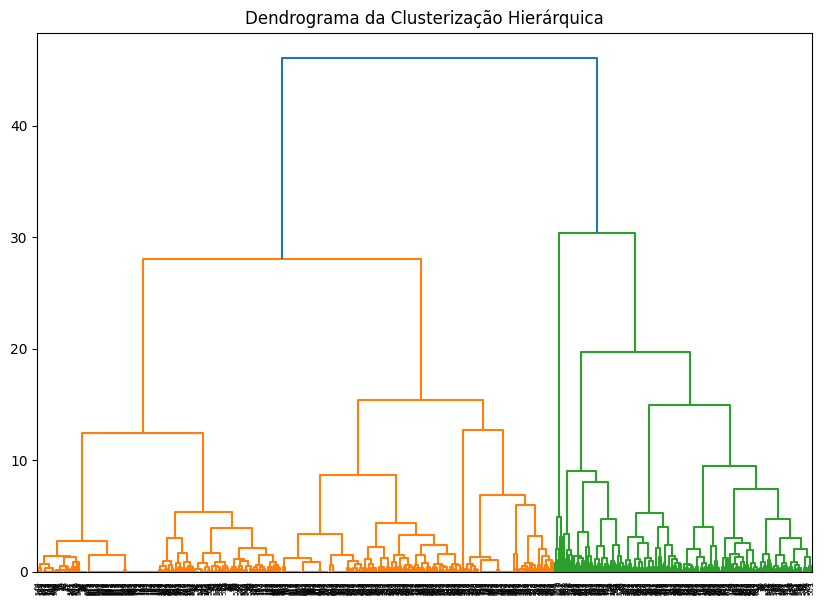

Índice de Silhueta para K-médias: 0.4543
Índice de Silhueta para Hierarchical Clustering: 0.3861


In [65]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt


# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Clusterização K-médias (KMeans)
# Definindo o número de clusters, por exemplo, K=2
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(X_scaled)
df['KMeans_Cluster'] = kmeans.labels_

# 2. Clusterização Hierárquica (HClust)
# Realizando o linkage usando o método de Ward (geralmente usado para minimização de variância)
Z = linkage(X_scaled, method='ward')

# Visualização do dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma da Clusterização Hierárquica')
plt.show()

# Aplicando o corte do dendrograma para formar 2 clusters (alterar conforme desejado)
hclust_labels = fcluster(Z, t=2, criterion='maxclust')
df['HClust_Cluster'] = hclust_labels

# 3. Cálculo do Índice de Silhueta

# Índice de Silhueta para K-médias
silhouette_kmeans = silhouette_score(X_scaled, kmeans.labels_)
print(f"Índice de Silhueta para K-médias: {silhouette_kmeans:.4f}")

# Índice de Silhueta para Clusterização Hierárquica
silhouette_hclust = silhouette_score(X_scaled, hclust_labels)
print(f"Índice de Silhueta para Hierarchical Clustering: {silhouette_hclust:.4f}")

Valores médios de cada grupo (empregue groupby() adicionando os grupos obtidos ao dataframe)

In [66]:

# 4. Cálculo das Médias por Grupo e Adicionar ao DataFrame
# Excluir a coluna 'Class' e garantir que só as colunas numéricas sejam usadas no groupby
df_numerical = df.drop(columns=['Class'])

# Calcular as médias para cada grupo do K-means
kmeans_group_avg = df_numerical.groupby('KMeans_Cluster').mean()

# Calcular as médias para cada grupo do HClust
hclust_group_avg = df_numerical.groupby('HClust_Cluster').mean()

# Adicionando as médias ao DataFrame original

# Para K-means
for column in kmeans_group_avg.columns:
    df[f'{column}_KMeans_Mean'] = df['KMeans_Cluster'].map(kmeans_group_avg[column])

# Para Hierarchical Clustering
for column in hclust_group_avg.columns:
    df[f'{column}_HClust_Mean'] = df['HClust_Cluster'].map(hclust_group_avg[column])

# Exibir o DataFrame com as médias dos grupos
print("\nDataFrame com as médias dos grupos:")
print(df)



DataFrame com as médias dos grupos:
     Recency  Frequency  Monetary  Time        Class  KMeans_Cluster  \
0          2         50     12500    98      donated               1   
1          0         13      3250    28      donated               1   
2          1         16      4000    35      donated               1   
3          2         20      5000    45      donated               1   
4          1         24      6000    77  not donated               1   
..       ...        ...       ...   ...          ...             ...   
743       23          2       500    38  not donated               0   
744       21          2       500    52  not donated               0   
745       23          3       750    62  not donated               0   
746       39          1       250    39  not donated               0   
747       72          1       250    72  not donated               0   

     HClust_Cluster  Recency_KMeans_Mean  Frequency_KMeans_Mean  \
0                 2            

Variância explicada pelas 2 componentes principais: [0.63526102 0.27534047]
Índice de Silhueta para K-médias (PCA): 0.4839
Índice de Silhueta para Hierarchical Clustering (PCA): 0.3840


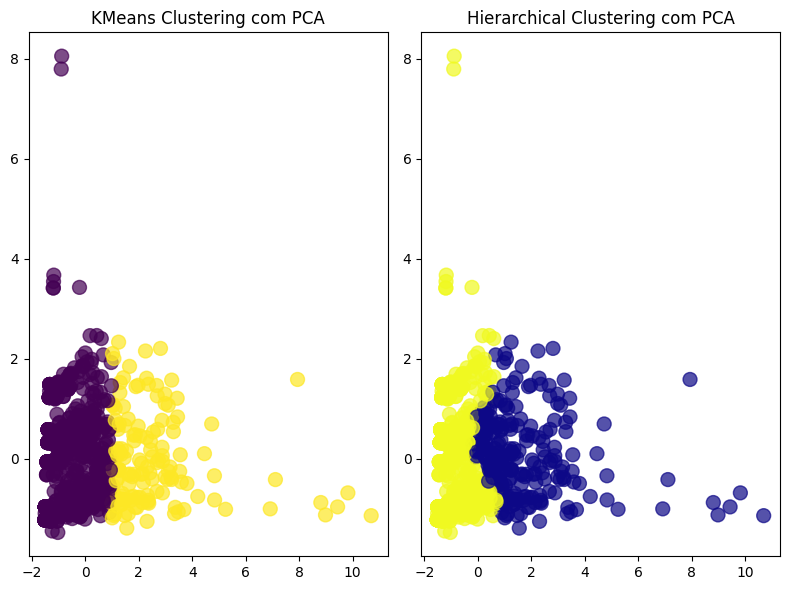


DataFrame com clusters atribuídos:
     Recency  Frequency  Monetary  Time        Class  KMeans_Cluster  \
0          2         50     12500    98      donated               1   
1          0         13      3250    28      donated               1   
2          1         16      4000    35      donated               1   
3          2         20      5000    45      donated               1   
4          1         24      6000    77  not donated               1   
..       ...        ...       ...   ...          ...             ...   
743       23          2       500    38  not donated               0   
744       21          2       500    52  not donated               0   
745       23          3       750    62  not donated               0   
746       39          1       250    39  not donated               0   
747       72          1       250    72  not donated               0   

     HClust_Cluster  Recency_KMeans_Mean  Frequency_KMeans_Mean  \
0                 1             

In [67]:


# 1. Aplicando PCA para redução de dimensionalidade
pca = PCA(n_components=2)  # Reduzir para 2 componentes principais
X_pca = pca.fit_transform(X_scaled)

# Mostrar a quantidade de variância explicada por cada componente
print(f"Variância explicada pelas 2 componentes principais: {pca.explained_variance_ratio_}")

# 2. Clusterização K-médias nas componentes principais
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(X_pca)
df['KMeans_Cluster'] = kmeans.labels_

# 3. Clusterização Hierárquica nas componentes principais
Z = linkage(X_pca, method='ward')
hclust_labels = fcluster(Z, t=2, criterion='maxclust')
df['HClust_Cluster'] = hclust_labels

# 4. Cálculo do Índice de Silhueta para K-means e HClust
silhouette_kmeans = silhouette_score(X_pca, kmeans.labels_)
print(f"Índice de Silhueta para K-médias (PCA): {silhouette_kmeans:.4f}")

silhouette_hclust = silhouette_score(X_pca, hclust_labels)
print(f"Índice de Silhueta para Hierarchical Clustering (PCA): {silhouette_hclust:.4f}")

# 5. Visualização dos clusters com as 2 componentes principais
plt.figure(figsize=(8, 6))

# KMeans
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['KMeans_Cluster'], cmap='viridis', s=100, alpha=0.7)
plt.title('KMeans Clustering com PCA')

# Hierarchical Clustering
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['HClust_Cluster'], cmap='plasma', s=100, alpha=0.7)
plt.title('Hierarchical Clustering com PCA')

plt.tight_layout()
plt.show()

# Exibir o DataFrame com as atribuições de clusters
print("\nDataFrame com clusters atribuídos:")
print(df)


In [72]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import linkage, fcluster

# Supondo que df já exista

# Remover a coluna 'Class' para as análises de clusterização
X = df.drop(['Class'], axis=1)

# Verificar se há colunas não numéricas e removê-las (caso exista alguma que não seja numérica)
X = X.select_dtypes(include=[np.number])

# Normalização dos dados (aplicando apenas nas colunas numéricas)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Clusterização K-médias
kmeans = KMeans(n_clusters=2, random_state=1)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# 2. Clusterização Hierárquica
Z = linkage(X_scaled, method='ward')
df['HClust_Cluster'] = fcluster(Z, t=2, criterion='maxclust')

# 3. Mapear os clusters para as classes reais
# Vamos mapear os clusters para a classe mais comum em cada cluster

# Função para mapear os clusters para as classes reais
def map_clusters_to_classes(cluster_labels, true_labels):
    # Criar um DataFrame de correspondência entre clusters e classes
    cluster_class_map = {}
    for cluster in np.unique(cluster_labels):
        # Para cada cluster, encontrar a classe mais comum
        most_common_class = true_labels[cluster_labels == cluster].mode()[0]
        cluster_class_map[cluster] = most_common_class
    return cluster_class_map

# Mapeando os clusters para as classes reais
kmeans_class_map = map_clusters_to_classes(df['KMeans_Cluster'], df['Class'])
hclust_class_map = map_clusters_to_classes(df['HClust_Cluster'], df['Class'])

# 4. Atribuir as classes mapeadas aos clusters
df['KMeans_Class_Mapped'] = df['KMeans_Cluster'].map(kmeans_class_map)
df['HClust_Class_Mapped'] = df['HClust_Cluster'].map(hclust_class_map)

# 5. Calcular a acuracidade comparando as classes mapeadas com as classes reais
kmeans_accuracy = accuracy_score(df['Class'], df['KMeans_Class_Mapped'])
hclust_accuracy = accuracy_score(df['Class'], df['HClust_Class_Mapped'])

# Exibir as acurácias
print(f"Acuracidade do K-means: {kmeans_accuracy:.4f}")
print(f"Acuracidade do Hierarchical Clustering: {hclust_accuracy:.4f}")

# Exibir o DataFrame com as classes mapeadas
print("\nDataFrame com as classes mapeadas para os clusters:")
print(df)


Acuracidade do K-means: 0.7620
Acuracidade do Hierarchical Clustering: 0.7620

DataFrame com as classes mapeadas para os clusters:
     Recency  Frequency  Monetary  Time        Class  KMeans_Cluster  \
0          2         50     12500    98      donated               1   
1          0         13      3250    28      donated               1   
2          1         16      4000    35      donated               1   
3          2         20      5000    45      donated               1   
4          1         24      6000    77  not donated               1   
..       ...        ...       ...   ...          ...             ...   
743       23          2       500    38  not donated               0   
744       21          2       500    52  not donated               0   
745       23          3       750    62  not donated               0   
746       39          1       250    39  not donated               0   
747       72          1       250    72  not donated               0   

    

## Teoria

* **Clusterização Kmédias e HClust** cálculo do silhueta, valores médios de cada grupo, cai a regra do cotovelo, hcluster "linkages", centróides, construção do dendograma

* **Modelos Supervisionados X Não Supervisionados**

Teoria de Clusterização: K-médias e HClust
A clusterização é uma técnica de aprendizado não supervisionado usada para agrupar dados em conjuntos (clusters) de maneira que os dados dentro de um cluster sejam mais semelhantes entre si do que com os dados de outros clusters. Existem várias abordagens para realizar a clusterização, sendo que as duas mais comuns são o K-means e o Hierarchical Clustering (HClust).

1. K-means (K-médias)
O K-means é um algoritmo de clusterização baseado em distâncias, que tenta dividir os dados em
𝐾
K grupos (ou clusters). O algoritmo funciona da seguinte forma:

Inicialmente, seleciona-se
𝐾
K pontos centrais (centróides) aleatórios.
Cada ponto é atribuído ao centroide mais próximo (com base em uma métrica de distância, como a Euclidiana).
O centroide de cada cluster é recalculado como a média dos pontos pertencentes a ele.
Esse processo é repetido até que os centroides não mudem mais (ou o número de iterações seja alcançado).
2. Hierarchical Clustering (HClust)
O Hierarchical Clustering é outro método de clusterização que cria uma hierarquia de clusters em forma de uma árvore (dendrograma). Este método pode ser aglomeração (bottom-up) ou divisão (top-down):

Aglomeração (Bottom-up): começa com cada ponto como um cluster individual e, em seguida, agrupa os clusters mais próximos.
Divisão (Top-down): começa com todos os pontos em um único cluster e divide os clusters em grupos menores.
Cálculo do Índice de Silhueta
O índice de silhueta é uma métrica usada para avaliar a qualidade da clusterização. Ele mede o quão bem um ponto está colocado no seu cluster em relação aos outros clusters. A pontuação vai de -1 a 1, onde:

1 significa que o ponto está bem posicionado dentro do seu cluster.
0 significa que o ponto está na fronteira entre dois clusters.
-1 significa que o ponto foi mal posicionado, pois está mais próximo de um cluster diferente.
Valores Médios de Cada Grupo
Depois de realizar a clusterização, é comum calcular os valores médios de cada variável para os diferentes clusters. Isso ajuda a entender as características médias de cada grupo. Isso pode ser feito usando o groupby() do pandas.

Regra do Cotovelo
A Regra do Cotovelo é uma técnica usada para determinar o número ideal de clusters para o K-means. O princípio é:

Para diferentes valores de
𝐾
K (número de clusters), calcula-se a soma dos erros quadráticos dentro dos clusters (inertia).
À medida que
𝐾
K aumenta, a inertia diminui, mas em algum ponto, a diminuição começa a ser menos pronunciada, formando um "cotovelo".
O valor de
𝐾
K no "cotovelo" é considerado o número ideal de clusters.
Linkages e Dendrograma no HClust
Linkages: No Hierarchical Clustering, o "linkage" descreve como os clusters são combinados. Existem várias abordagens de linkage:

Single linkage: A distância entre dois clusters é a menor distância entre pontos de ambos os clusters.
Complete linkage: A distância entre dois clusters é a maior distância entre pontos de ambos os clusters.
Average linkage: A distância entre dois clusters é a média das distâncias entre todos os pares de pontos dos dois clusters.
Ward linkage: Minimiza a soma das variâncias dentro dos clusters, resultando em clusters mais compactos.
Dendrograma: Um dendrograma é uma representação visual hierárquica dos clusters. Ele mostra como os pontos ou clusters são agrupados à medida que o nível de similaridade aumenta. O dendrograma pode ser cortado em um nível específico para definir o número de clusters desejado.

Centróides
Os centróides são os centros de cada cluster no K-means. Eles são calculados como a média das características dos pontos que pertencem a um determinado cluster. A posição do centroide é crucial para a separação de clusters.

Modelos Supervisionados vs Não Supervisionados
A distinção entre modelos supervisionados e não supervisionados está na forma como os dados são utilizados para treinar o modelo.

Modelos Supervisionados
Em aprendizado supervisionado, o modelo é treinado com dados rotulados, ou seja, os dados de entrada são acompanhados de saídas (rótulos ou classes). O modelo aprende uma função que mapeia os dados de entrada para as saídas correspondentes.

Objetivo: Prever ou classificar novas amostras com base em um conjunto de dados rotulado.
Exemplos de Algoritmos:
Classificação: Decision Trees, SVM, Logistic Regression, Random Forest, KNN.
Regressão: Linear Regression, Ridge Regression, Lasso Regression.
Modelos Não Supervisionados
Em aprendizado não supervisionado, o modelo é treinado com dados não rotulados, ou seja, as saídas não são conhecidas. O objetivo é descobrir padrões, estruturas ou agrupamentos dentro dos dados sem ter rótulos de saída.

Objetivo: Encontrar padrões ou agrupamentos nos dados.
Exemplos de Algoritmos:
Clusterização: K-means, Hierarchical Clustering, DBSCAN.
Redução de Dimensionalidade: PCA (Principal Component Analysis), t-SNE, Autoencoders.
Resumo das Diferenças:
Característica	Modelos Supervisionados	Modelos Não Supervisionados
Tipo de Dados	Dados rotulados	Dados não rotulados
Objetivo	Prever ou classificar	Encontrar padrões ou agrupamentos
Exemplos de Algoritmos	KNN, SVM, Decision Trees, etc.	K-means, DBSCAN, PCA, etc.
Resultado Esperado	Previsões (classes, valores)	Agrupamentos, reduções de dimensionalidade
Aplicação de Conceitos:
Cálculo do Índice de Silhueta para K-means e HClust: Após aplicar a clusterização (K-means ou HClust), calcule o índice de silhueta para avaliar a qualidade dos clusters. Um valor maior de silhueta indica uma melhor qualidade na formação dos clusters.

Valores Médios de Cada Grupo: Após a clusterização, use o groupby() para calcular as médias de cada grupo (cluster) para as variáveis de entrada. Isso ajuda a entender as características dos grupos formados.

Cálculo da Regra do Cotovelo: Aplique a regra do cotovelo para determinar o número ideal de clusters para o K-means. Isso pode ser feito gerando um gráfico de inertia versus o número de clusters.

Dendrograma em HClust: Crie o dendrograma para visualizar a hierarquia dos clusters e corte-o em um nível adequado para definir o número de clusters desejado.

Esses conceitos formam a base de técnicas de clusterização e a comparação entre modelos supervisionados e não supervisionados, sendo fundamentais para entender como explorar e interpretar dados não rotulados ou rotulados em tarefas de aprendizado de máquina.

# Séries Temporais

* `ARIMA(p,d,q)`

1. Preparação dos dados, `index` = `datetime`, `resample()`
2. Estacionariedade, `adfuller()`, $\rightarrow$ `d`, se não estacionário `.diff()`  
3. ACF $\rightarrow$ `q`, PACF $\rightarrow$ `p`, gráficos sobre a série estacionária!
3. `ARIMA(p,d,q)`

4. Predição de n-steps ou até uma data
5. Cálculo do erro de predição (RMSE, MSE, MAPE)

* Extra,








Predicao

In [68]:
import pandas as pd
import numpy as np

# Generate a date range for the time series index
date_rng = pd.date_range(start='1/1/2023', periods=100, freq='D')

# Create a sample time series data with random values
data = np.random.randn(100)

# Create the pandas Series with the datetime index
time_series = pd.DataFrame(data, index=date_rng)
time_series.columns = ['value']
time_series

,value
2023-01-01,0.922010
2023-01-02,-0.647625
2023-01-03,2.018241
2023-01-04,-0.033804
2023-01-05,-0.115155
...,...
2023-04-06,0.106899
2023-04-07,0.256455
2023-04-08,0.459724
2023-04-09,-0.263482


In [69]:
time_series['value_t-1'] = time_series['value'].shift(1)
time_series['value_t-2'] = time_series['value'].shift(2)
time_series['value_t-3'] = time_series['value'].shift(3)
time_series

,value,value_t-1,value_t-2,value_t-3
2023-01-01,0.922010,NaN,NaN,NaN
2023-01-02,-0.647625,0.922010,NaN,NaN
2023-01-03,2.018241,-0.647625,0.922010,NaN
2023-01-04,-0.033804,2.018241,-0.647625,0.922010
2023-01-05,-0.115155,-0.033804,2.018241,-0.647625
...,...,...,...,...
2023-04-06,0.106899,1.191589,-0.817191,1.701690
2023-04-07,0.256455,0.106899,1.191589,-0.817191
2023-04-08,0.459724,0.256455,0.106899,1.191589
2023-04-09,-0.263482,0.459724,0.256455,0.106899


In [75]:
# Resample para a frequência mensal, por exemplo
time_series_resampled = time_series.resample('M').mean()
time_series_resampled

<ipython-input-75-23898303654e>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series_resampled = time_series.resample('M').mean()


,value,value_t-1,value_t-2,value_t-3
2023-01-31,-0.073128,-0.065571,-0.018518,0.023210
2023-02-28,0.290543,0.274052,0.232975,0.138506
2023-03-31,0.028734,0.066504,0.068698,0.094075
2023-04-30,0.424485,0.132528,0.124081,0.145264


2. Verificação de Estacionariedade

In [76]:
from statsmodels.tsa.stattools import adfuller

# Teste ADF
result = adfuller(time_series['value'].dropna())
print(f"Estatística ADF: {result[0]}")
print(f"P-valor: {result[1]}")
print(f"Valores críticos: {result[4]}")


Estatística ADF: -10.007874471327513
P-valor: 1.8111706600769554e-17
Valores críticos: {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


Se o p-valor for menor que 0.05, podemos concluir que a série temporal é estacionária. Caso contrário, a série não é estacionária, e você precisará diferenciá-la para torná-la estacionária. A diferenciação pode ser feita da seguinte maneira:

In [77]:
# Se a série não for estacionária, aplicar a diferenciação
time_series['value_diff'] = time_series['value'].diff().dropna()


3. ACF (Autocorrelation Function) e PACF (Partial Autocorrelation Function)

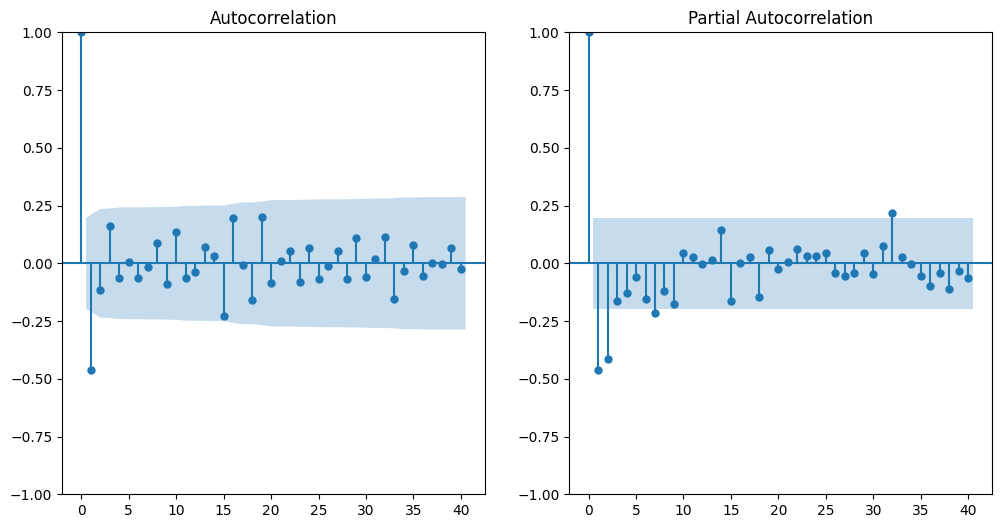

In [78]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotando ACF e PACF para a série diferenciada
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(time_series['value_diff'].dropna(), lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(time_series['value_diff'].dropna(), lags=40, ax=plt.gca())
plt.show()


A partir desses gráficos, podemos observar o número de lags que exibem uma autocorrelação significativa, ajudando a escolher os valores de p (para AR) e q (para MA).


4. Modelo ARIMA(p,d,q)
O modelo ARIMA é composto por três parâmetros:

p: ordem do autorregressor (AR)
d: número de diferenciações necessárias para estacionarizar a série
q: ordem da média móvel (MA)
Você pode treinar o modelo ARIMA da seguinte forma:

In [81]:
from statsmodels.tsa.arima.model import ARIMA

p = 1  # Baseado no gráfico PACF
d = 0  # A série foi diferenciada para tornar estacionária
q = 1  # Baseado no gráfico ACF

# Treinando o modelo ARIMA
model = ARIMA(time_series['value'], order=(p, d, q))
model_fit = model.fit()

# Resumo do modelo
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -138.419
Date:                Thu, 21 Nov 2024   AIC                            284.837
Time:                        14:11:28   BIC                            295.258
Sample:                    01-01-2023   HQIC                           289.055
                         - 04-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1111      0.100      1.109      0.268      -0.085       0.307
ar.L1         -0.7084      0.753     -0.941      0.347      -2.183       0.767
ma.L1          0.7525      0.704      1.069      0.2

In [84]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Exemplo de série temporal fictícia (substitua com seus dados)
# Supondo que time_series seja o DataFrame com a coluna 'value'
# E a série foi dividida em treino e teste

# Divida a série temporal em treino e teste (80% treino e 20% teste)
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Ajustar o modelo ARIMA
# Aqui usamos (p=1, d=0, q=1) como exemplo, ajuste para os melhores parâmetros encontrados
model = ARIMA(train['value'], order=(1, 0, 1))
model_fit = model.fit()

# Realizar a previsão para n-steps (n = número de dados no teste, ou qualquer outro valor desejado)
n_steps = len(test)  # ou escolha o número de passos n desejado
forecast = model_fit.forecast(steps=n_steps)

# Comparando as previsões com os valores reais do conjunto de teste
y_true = test['value'].values
y_pred = forecast



# Exibindo as previsões
print("Previsões de n-steps:")
print(forecast)

# Calculando os erros de predição
rmse = sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE: {rmse}")

mse = mean_squared_error(y_true, y_pred)
print(f"MSE: {mse}")

mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"MAPE: {mape}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Previsões de n-steps:
2023-03-22    0.293091
2023-03-23    0.267426
2023-03-24    0.244696
2023-03-25    0.224566
2023-03-26    0.206737
2023-03-27    0.190948
2023-03-28    0.176964
2023-03-29    0.164580
2023-03-30    0.153611
2023-03-31    0.143897
2023-04-01    0.135294
2023-04-02    0.127675
2023-04-03    0.120927
2023-04-04    0.114951
2023-04-05    0.109658
2023-04-06    0.104971
2023-04-07    0.100820
2023-04-08    0.097143
2023-04-09    0.093887
2023-04-10    0.091003
Freq: D, Name: predicted_mean, dtype: float64
RMSE: 0.8704747171393804
MSE: 0.7577262331788843
MAPE: 1.0225235527401095


## Teoria

* Características das Séries Temporais, T+S+R, ciclos
* Características do modelo ARIMA = AR + I + MA



Características das Séries Temporais
Uma série temporal é uma sequência de dados observados ao longo do tempo. Ela pode ser caracterizada por diferentes componentes que podem ser analisados para entender o comportamento da série e tomar decisões sobre como modelá-la. As principais características das séries temporais são:

1. Tendência (Trend - T):
Refere-se à direção de longo prazo que a série temporal segue. Pode ser crescente, decrescente ou estacionária.
Exemplo: Um aumento gradual nas vendas de um produto ao longo dos anos.
2. Sazonalidade (Seasonality - S):
É um padrão repetitivo ou cíclico que ocorre em intervalos regulares, geralmente devido a fatores sazonais. Pode ser anual, mensal, diário, etc.
Exemplo: Aumento nas vendas de roupas de inverno durante os meses mais frios ou aumento do turismo durante feriados.
3. Ruído (Noise - R):
Refere-se a variações aleatórias ou imprevisíveis na série temporal que não podem ser explicadas por tendência ou sazonalidade. É basicamente o erro ou aleatoriedade no comportamento dos dados.
Exemplo: Fatores imprevisíveis que afetam uma variável como a temperatura ou o consumo de energia.
4. Ciclos:
Ciclos são flutuações na série temporal que ocorrem em intervalos irregulares e não são previsíveis com a mesma regularidade que a sazonalidade. Os ciclos podem ser causados por fatores econômicos ou outros eventos de longo prazo.
Exemplo: Flutuações econômicas ou ciclos de mercado que não seguem uma periodicidade fixa, mas ainda assim podem influenciar os dados temporais.
Modelo ARIMA: AR + I + MA
O modelo ARIMA (AutoRegressive Integrated Moving Average) é um modelo amplamente utilizado para modelagem e previsão de séries temporais. Ele combina três componentes principais:

1. AR (AutoRegressive - Autoregressivo):
O termo AR refere-se à parte autoregressiva do modelo. Isso significa que o valor atual da série temporal é modelado com base em uma combinação linear dos valores passados da própria série.
O número de lags (atrasos) usados na parte autoregressiva é determinado pelo parâmetro
𝑝
p, que indica quantos valores anteriores da série são usados na previsão.
Exemplo: Previsão de temperatura com base na temperatura dos últimos dias.
2. I (Integrated - Integrado):
O termo I refere-se à diferenciação. Em séries temporais não estacionárias, é necessário tornar a série estacionária para aplicar modelos como o ARIMA. A diferenciação é feita subtraindo-se o valor anterior do valor atual da série.
O parâmetro
𝑑
d indica o número de vezes que a série temporal precisa ser diferenciada para tornar-se estacionária.
Exemplo: Se a série temporal tem uma tendência, ao aplicar a diferenciação, podemos remover a tendência e tornar a série estacionária.
3. MA (Moving Average - Média Móvel):
O termo MA se refere à parte de média móvel do modelo, onde o valor atual da série temporal é modelado com base nos erros de previsão passados. Ou seja, a média dos erros de previsão de
𝑞
q períodos anteriores é usada para ajustar a previsão.
O parâmetro
𝑞
q indica quantos lags de erro são usados na média móvel.
Exemplo: Se o erro de previsão de um dia anterior foi grande, podemos ajustar a previsão atual com base nesse erro.
Combinação dos Componentes AR, I e MA no ARIMA
ARIMA(p, d, q): Um modelo ARIMA é determinado pelos três parâmetros:
p: Número de lags da parte autoregressiva (AR).
d: Número de diferenciações necessárias para tornar a série estacionária (I).
q: Número de lags da média móvel (MA).
Exemplo:
Um modelo ARIMA(1, 1, 1) significa:

p = 1: Usamos um valor da série temporal anterior para prever o valor atual (AR).
d = 1: Aplicamos uma diferenciação para tornar a série estacionária.
q = 1: Usamos um erro de previsão anterior para ajustar a previsão (MA).
Resumo:
Tendência (T): Movimento de longo prazo da série.
Sazonalidade (S): Padrões periódicos e regulares.
Ruído (R): Variações aleatórias.
Ciclos: Flutuações irregulares.
O ARIMA é uma combinação de autoregressão (AR), diferenciação (I) e média móvel (MA), onde os parâmetros
𝑝
p,
𝑑
d e
𝑞
q são ajustados para capturar as características da série temporal.